### Ex 1 :  théorème des valeurs intermédiaires

1. Rappel \
Soit f  une fonction continue définie sur un intervalle I et, a et b deux réels de I. Pour tout réel k compris entre f(a) et f(b), il existe au moins un réel c compris entre a et b tel que f(c)=k.

Soit f une fonction continue et strictement monotone sur un intervalle [a;b]. Pour tout nombre k compris entre f(a) et f(b), l'équation f(x)=k admet une unique solution dans l'intervalle [a;b].

2. Application \
Nous considérons dans cet exercice la fonction f, définie sur l'intervalle [0;1] par: f(x)=x$^3$+2x−2
Par la conséquence du théorème des valeurs intermédiaires, l'équation f(x)=0 admet une unique solution x$_0$ dans [0;1]

\* vérifier continuité et stricte monotonie de f sur [0;1] \
\* Pour savoir si x$_0$ se trouve dans [0;0,5] ou dans [0,5;1], il faut vérifier si f(0) et f(0,5)  sont de même signe \
\* proposer un algorithme de recherche pour évaluer x$_0$ en fonction de $N$, donné par l'utilisateur

#### Correction

f'(x) = 3x$^2$+2 \
Pour x $\in$ [0,1], f'(x) > 0 $\Rightarrow$ f(x) strictement croissante donc strictement monotone \
De plus, f(x) est définie pour tout x $\in$ $\mathbb{R}$ donc f(x) continue sur $\mathbb{R}$ donc continue sur [0,1]

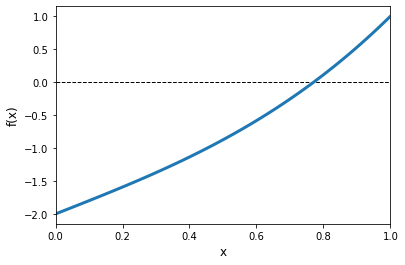

f(x) semble strictement monotone


In [5]:
def f(x):
    
    return x**3+2*x-2

def plot_f(function,interv=[0,1],step=1e-2):
    
    import matplotlib.pyplot as plt
    import numpy as np
    
    x_list = np.arange(interv[0],interv[1]+step,step)
    plt.plot(x_list, f(x_list),linewidth=3)
    plt.xlim(interv)
    plt.xlabel("x",size=12)
    plt.ylabel("f(x)",size=12)
    plt.hlines(0,interv[0],interv[1],linestyle='--',linewidth=1)
    plt.show()

plot_f(f)

In [62]:
def trouve_racine(function,N=1,interv=[0,1]):
    #N = precision de la valeur de x_0, avec x_0 tel que function(x_0) = 0 
    #Fonctionne par dichotomie
    
    x0 = 1
    i = 0
    
    while abs(function(x0)) > N:
        val1, val2, val3 = function(min(interv)), function((interv[0]+interv[1])/2), function(max(interv))
        if val1*val2 < 0:
            interv = [min(interv),(interv[0]+interv[1])/2]
        elif val2*val3 < 0:
            interv = [(interv[0]+interv[1])/2,max(interv)]
        else:
            print("Impossible de trouver la racine de la fonction dans l'intervalle",interv)
            return
        i = i+1
        x0 = (interv[0]+interv[1])/2
        
    print(f"Racine trouvée après {i} itérations.")
    
    return x0

x0 = trouve_racine(f,N=1e-2,interv=[0,1])
print(f"f(x) s'approche de 0 pour x = {x0} avec f({x0})={f(x0)}")

Racine trouvée après 6 itérations.
f(x) s'approche de 0 pour x = 0.7734375 avec f(0.7734375)=0.009549617767333984


### Ex 2: Carrés magiques
Un carré magique est un tableau carré de taille n×n qui contient tous les entiers de 1 à n$^2$ et qui vérifie que : la somme de chaque ligne, la somme de chaque colonne, la somme de la diagonale principale et la somme de l’anti-diagonale ont toutes la même valeur.

Pour un carré magique de taille n×n, la valeur de la somme est : S$_n$=$\frac{n(n^2+1)}{2}$

1. Définir un tableau pour chacun des exemples 3×3 et 4×4
2. Définir une fonction est_carre_magique(carre) qui teste si un tableau donné est (ou pas) un carré magique
3. Génèrer de façon aléatoire des carrés contenant les entiers de 1 à n$^2$ grâce à une fonction carre_aleatoire(n). 
4. Définir la probabilité d'obtenir un carrée magique
5. Définir une fonction addition_carre(carre,k) qui ajoute un entier k à tous les éléments du carré.


In [20]:
import numpy as np

# Pour n = 3, S_n = 15
carre_3 = np.array([2,7,6,9,5,1,4,3,8]).reshape(3,3)
print(carre_3)
print(carre_3[:,0])
# Pour n = 4, S_n = 34
carre_4 = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]])
print(carre_4)

[[2 7 6]
 [9 5 1]
 [4 3 8]]
[2 9 4]
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]


In [21]:
def est_carre_magique(carre):
    
    import numpy as np
    
    n = len(carre)
    Sn = (n*(n**2+1))/2
        
    somme_lignes = carre.sum(axis=1)
    somme_colonnes = carre.sum(axis=0)
    #diag = carre.diagonal()
    #anti-diag = np.flipud(carre).diagonal()
    somme_diag = carre.trace()
    somme_adiag = np.flipud(carre).trace()
    
    for somme in somme_lignes:
        if somme != Sn:
            return "Non"
        else:
            pass
        
    for somme in somme_colonnes:
        if somme != Sn:
            return "Non"
        else:
            pass
        
    if somme_diag != Sn:
        return "Non"
    if somme_adiag != Sn:
        return "Non"
    
    #Ou plus simplement sans utiliser de fonction numpy
    #for ligne in carre:
    #    print(np.sum(ligne),ligne)
    #    if np.sum(ligne) != Sn:
    #        return 0
    #    else:
    #        pass    
        
    return "Oui"

print(est_carre_magique(carre_3))
print(est_carre_magique(carre_4))

Oui
Non


In [240]:
def carre_aleatoire(n):
    
    import numpy as np
    carre = np.random.choice(np.arange(1,n**2+1), (n,n), replace = False)
    
    return carre

def proba_carre_magique(N,n):
    """
    N = nombre de tirages de carré à tester
    n = dimension des carrés à tester
    Cette fonction renvoie la probabilité de trouver un carré magique sur N tirages
    P = nombre de carrés magiques trouvés / N
    """
    compt, compt_carre = 0, 0
    
    while compt < N:
        carre = carre_aleatoire(n)
        if est_carre_magique(carre) == "Oui":
            compt_carre += 1
            print("Ce carré est magique :")
            print(carre)
        compt = compt + 1
        
    return compt_carre/compt

n = 3
nb_tirages = 1e5
P = proba_carre_magique(nb_tirages,n)
print(f"Probabilité d'avoir un carré magique de taille {n}x{n} sur {nb_tirages} tirages = {P*100}%")

Probabilité d'avoir un carré magique de taille 4x4 sur 100000.0 tirages = 0.0%
